In [1]:
#!pip install pandas_datareader

In [1]:
#import pandas_datareader as pdr
import pandas as pd
import datetime as dt

# Data loading and preprocessing

In [2]:
df0= pd.read_csv('Quote-Equity-HINDALCO-EQ-01-01-2008-to-01-01-2010.csv')
df1= pd.read_csv('Quote-Equity-HINDALCO-EQ-01-01-2010-to-01-01-2012.csv')
df2= pd.read_csv('Quote-Equity-HINDALCO-EQ-01-01-2012-to-01-01-2014.csv')
df3= pd.read_csv('Quote-Equity-HINDALCO-EQ-01-01-2014-to-01-01-2016.csv')
df4= pd.read_csv('Quote-Equity-HINDALCO-EQ-01-01-2016-to-01-01-2018.csv')
df5= pd.read_csv('Quote-Equity-HINDALCO-EQ-01-01-2018-to-01-01-2020.csv')
df6= pd.read_csv('Quote-Equity-HINDALCO-EQ-01-01-2020-to-01-01-2022.csv')
df7= pd.read_csv('Quote-Equity-HINDALCO-EQ-01-01-2022-to-23-06-2022.csv')
df = pd.concat([df0,df1,df2,df3,df4,df5,df6,df7], axis=0)
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,31-Dec-2009,EQ,160.45,162.20,158.80,159.90,161.20,160.85,160.81,163.00,36.75,13651988,"2,195,336,426.60",NaN
1,30-Dec-2009,EQ,163.00,163.00,158.50,162.00,159.65,159.90,160.51,163.00,36.75,15195007,"2,438,952,148.35",NaN
2,29-Dec-2009,EQ,152.25,162.80,152.25,158.15,162.00,162.00,159.58,162.80,36.75,16533655,"2,638,421,095.30",NaN
3,24-Dec-2009,EQ,153.85,159.90,152.15,153.40,158.00,158.15,156.23,159.90,36.75,21658847,"3,383,825,248.40",NaN
4,23-Dec-2009,EQ,143.00,155.90,142.30,142.45,152.75,153.40,151.13,155.90,36.75,20794471,"3,142,663,895.60",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,07-Jan-2022,EQ,481.10,495.25,480.05,479.10,493.00,493.50,488.46,551.85,224.55,9300149,"4,542,794,717.05",145242.0
114,06-Jan-2022,EQ,474.50,485.70,473.50,475.35,478.80,479.10,480.76,551.85,224.55,12132277,"5,832,684,482.35",148948.0
115,05-Jan-2022,EQ,473.20,479.40,472.00,476.10,475.05,475.35,475.91,551.85,224.55,4489031,"2,136,378,732.75",75259.0
116,04-Jan-2022,EQ,479.00,481.50,472.00,478.05,476.00,476.10,476.28,551.85,224.55,5063834,"2,411,789,114.80",69690.0


### feature engineering

In [3]:
df2 = df.drop(columns = ['series ','VOLUME ', 'VALUE ','PREV. CLOSE ', 'ltp ', 'No of trades '], axis = 1)

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3589 entries, 0 to 117
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3589 non-null   object 
 1   OPEN    3589 non-null   float64
 2   HIGH    3589 non-null   float64
 3   LOW     3589 non-null   float64
 4   close   3589 non-null   float64
 5   vwap    3589 non-null   float64
 6   52W H   3589 non-null   float64
 7   52W L   3589 non-null   float64
dtypes: float64(7), object(1)
memory usage: 252.4+ KB


In [5]:
df2.columns

Index(['Date ', 'OPEN ', 'HIGH ', 'LOW ', 'close ', 'vwap ', '52W H ',
       '52W L '],
      dtype='object')

In [6]:
df2['Date '] = pd.to_datetime(df["Date "])

In [7]:
df2

,Date,OPEN,HIGH,LOW,close,vwap,52W H,52W L
0,2009-12-31,160.45,162.20,158.80,160.85,160.81,163.00,36.75
1,2009-12-30,163.00,163.00,158.50,159.90,160.51,163.00,36.75
2,2009-12-29,152.25,162.80,152.25,162.00,159.58,162.80,36.75
3,2009-12-24,153.85,159.90,152.15,158.15,156.23,159.90,36.75
4,2009-12-23,143.00,155.90,142.30,153.40,151.13,155.90,36.75
...,...,...,...,...,...,...,...,...
113,2022-01-07,481.10,495.25,480.05,493.50,488.46,551.85,224.55
114,2022-01-06,474.50,485.70,473.50,479.10,480.76,551.85,224.55
115,2022-01-05,473.20,479.40,472.00,475.35,475.91,551.85,224.55
116,2022-01-04,479.00,481.50,472.00,476.10,476.28,551.85,224.55


In [8]:
#def modif(data):
    #data = data
    #x= []
    #for i in data:
    #    x.append(i.replace(',',''))
    #return x

In [9]:
#df2['OPEN '] = modif(data = df2['OPEN '])
#df2['LOW '] = modif(data = df2['LOW '])
#df2['PREV. CLOSE '] = modif(data = df2['PREV. CLOSE '])
#df2['ltp '] = modif(data = df2['ltp '])
#df2['close '] = modif(data = df2['close '])
#df2['vwap '] = modif(data = df2['vwap '])
#df2['52W H '] = modif(data = df2['52W H '])
#df2['HIGH '] = modif(data = df2['HIGH '])

In [10]:
df2['Date'] = df2['Date ']
df2['OPEN'] = df2['OPEN '].astype(float)
df2['HIGH'] = df2['HIGH '].astype(float)
df2['LOW'] = df2['LOW '].astype(float)
df2['close'] = df2['close '].astype(float)
df2['vwap'] = df2['vwap '].astype(float)
df2['_52W_h'] = df2['52W H '].astype(float)
df2['_52W_L'] = df2['52W L ']

In [11]:
df2 = df2.drop(columns = ['Date ','OPEN ', 'HIGH ', 'LOW ','close ','vwap ', '52W H ', '52W L '], axis = 1)

In [12]:
df2.columns

Index(['Date', 'OPEN', 'HIGH', 'LOW', 'close', 'vwap', '_52W_h', '_52W_L'], dtype='object')

In [13]:
df2

,Date,OPEN,HIGH,LOW,close,vwap,_52W_h,_52W_L
0,2009-12-31,160.45,162.20,158.80,160.85,160.81,163.00,36.75
1,2009-12-30,163.00,163.00,158.50,159.90,160.51,163.00,36.75
2,2009-12-29,152.25,162.80,152.25,162.00,159.58,162.80,36.75
3,2009-12-24,153.85,159.90,152.15,158.15,156.23,159.90,36.75
4,2009-12-23,143.00,155.90,142.30,153.40,151.13,155.90,36.75
...,...,...,...,...,...,...,...,...
113,2022-01-07,481.10,495.25,480.05,493.50,488.46,551.85,224.55
114,2022-01-06,474.50,485.70,473.50,479.10,480.76,551.85,224.55
115,2022-01-05,473.20,479.40,472.00,475.35,475.91,551.85,224.55
116,2022-01-04,479.00,481.50,472.00,476.10,476.28,551.85,224.55


In [14]:
print(type(df2.Date[0]))

<class 'pandas.core.series.Series'>


In [15]:
data=df2.sort_values(by='Date',ascending=True)
data.head(30)

,Date,OPEN,HIGH,LOW,close,vwap,_52W_h,_52W_L
488,2008-01-01,216.00,218.10,213.40,215.50,215.15,240.0,120.0
487,2008-01-02,217.70,219.70,210.30,217.35,214.51,240.0,120.0
486,2008-01-03,218.00,221.40,211.55,212.95,215.59,240.0,120.0
485,2008-01-04,215.00,220.90,213.55,219.90,217.04,240.0,120.0
484,2008-01-07,217.00,219.00,212.00,218.00,217.12,240.0,120.0
483,2008-01-08,217.00,218.40,206.00,208.90,211.08,240.0,120.0
482,2008-01-09,210.00,214.65,205.00,211.95,212.16,240.0,120.0
481,2008-01-10,212.00,212.85,199.75,201.30,207.04,240.0,120.0
480,2008-01-11,203.00,204.80,197.20,202.10,200.86,240.0,120.0
479,2008-01-14,204.90,206.95,200.20,201.55,203.21,240.0,120.0


In [16]:
data = data.reset_index()

In [17]:
data = data.drop('index',axis = 1)

In [18]:
date = data['Date']
data = data.drop('Date',axis=1)

In [19]:
data

,OPEN,HIGH,LOW,close,vwap,_52W_h,_52W_L
0,216.0,218.10,213.40,215.50,215.15,240.0,120.00
1,217.7,219.70,210.30,217.35,214.51,240.0,120.00
2,218.0,221.40,211.55,212.95,215.59,240.0,120.00
3,215.0,220.90,213.55,219.90,217.04,240.0,120.00
4,217.0,219.00,212.00,218.00,217.12,240.0,120.00
...,...,...,...,...,...,...,...
3584,333.0,342.55,325.85,333.70,334.24,636.0,325.85
3585,331.0,334.60,308.95,321.50,317.37,636.0,308.95
3586,327.6,343.50,325.60,339.25,334.14,636.0,308.95
3587,334.0,334.00,315.45,316.45,321.01,636.0,308.95


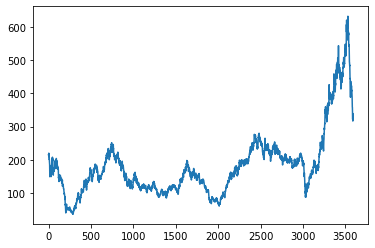

In [20]:
import matplotlib.pyplot as plt
plt.plot(data['close'])

In [21]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler =MinMaxScaler(feature_range=(0,1))
close = scaler.fit_transform(np.array(data['LOW']).reshape(-1,1))

In [23]:
close

array([[0.30055296],
       [0.2952786 ],
       [0.29740536],
       ...,
       [0.49145045],
       [0.4741812 ],
       [0.46678009]])

In [24]:
#we will divide data into train and test data
training_size = int(len(close)*0.65)
test_size =len(close) - training_size

In [25]:
training_size,test_size

(2332, 1257)

In [26]:
training_data,test_data= close[0:training_size,:],close[training_size:len(close),:1]

In [27]:
#extracting features from data using time step
def dataset(dataset,learning_or_time_steps = 1):
    data_x = []
    data_y = []
    for i in range(len(dataset)-learning_or_time_steps-1):
        a = dataset[i:i+learning_or_time_steps,0]
        data_x.append(a)
        data_y.append(dataset[i+learning_or_time_steps,0])
    return np.array(data_x), np.array(data_y)
        

In [28]:
ts = 10
x_train,y_train = dataset(training_data,ts)
x_test,y_test = dataset(test_data,ts)

In [29]:
print(x_train.shape)

(2321, 10)


In [30]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [163]:
!pip install tensorflow

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error',optimizer = 'adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 91,101
Trainable params: 91,101
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size =70,verbose = 1)

Epoch 1/50
34/34 [==============================] - 1s 20ms/step - loss: 4.3455e-05 - val_loss: 4.1841e-04
Epoch 2/50
34/34 [==============================] - 0s 14ms/step - loss: 4.3019e-05 - val_loss: 2.0677e-04
Epoch 3/50
34/34 [==============================] - 1s 19ms/step - loss: 5.1210e-05 - val_loss: 2.8276e-04
Epoch 4/50
34/34 [==============================] - 1s 16ms/step - loss: 4.3589e-05 - val_loss: 2.3033e-04
Epoch 5/50
34/34 [==============================] - 1s 17ms/step - loss: 4.2751e-05 - val_loss: 2.0332e-04
Epoch 6/50
34/34 [==============================] - 1s 18ms/step - loss: 4.1613e-05 - val_loss: 2.3942e-04
Epoch 7/50
34/34 [==============================] - 1s 18ms/step - loss: 4.1867e-05 - val_loss: 4.9497e-04
Epoch 8/50
34/34 [==============================] - 1s 18ms/step - loss: 4.2407e-05 - val_loss: 2.5935e-04
Epoch 9/50
34/34 [==============================] - 1s 18ms/step - loss: 4.3419e-05 - val_loss: 2.5752e-04
Epoch 10/50
34/34 [==================

In [36]:
import tensorflow as tf

In [37]:
tf.__version__

'2.9.1'

In [58]:
train_predict = model.predict(x_train)
test_prediction = model.predict(x_test)

39/39 [==============================] - 0s 4ms/step


In [59]:
def mape(y,y_pred):
    return np.mean(np.abs((y - y_pred)/y))
per_error = mape(y_test,test_prediction)
per_error

0.5627870411149413

In [60]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_prediction)
p=[]
for i in train_predict:
    p.append(i)
for i in test_predict:
    p.append(i)
p

[array([197.92397], dtype=float32),
 array([190.11632], dtype=float32),
 array([182.56999], dtype=float32),
 array([182.89532], dtype=float32),
 array([180.50455], dtype=float32),
 array([143.69406], dtype=float32),
 array([138.50076], dtype=float32),
 array([139.38298], dtype=float32),
 array([147.5897], dtype=float32),
 array([151.71684], dtype=float32),
 array([160.14944], dtype=float32),
 array([168.01932], dtype=float32),
 array([170.48303], dtype=float32),
 array([150.06181], dtype=float32),
 array([159.62222], dtype=float32),
 array([174.45201], dtype=float32),
 array([168.79538], dtype=float32),
 array([168.24742], dtype=float32),
 array([157.21362], dtype=float32),
 array([155.69188], dtype=float32),
 array([147.23238], dtype=float32),
 array([148.2323], dtype=float32),
 array([144.99449], dtype=float32),
 array([153.19562], dtype=float32),
 array([158.6131], dtype=float32),
 array([175.14813], dtype=float32),
 array([172.27396], dtype=float32),
 array([171.10881], dtype=float

In [61]:
#calculate rmse
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

136.7186859780273

In [62]:
math.sqrt(mean_squared_error(y_test,test_predict))

279.3274530084334

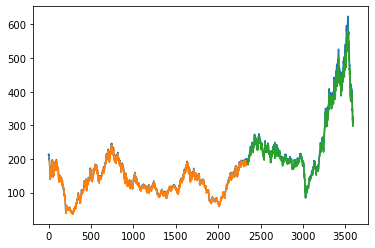

In [63]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = np.empty_like(close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



In [64]:
x_input=test_data[252:].reshape(1,-1)
x_input.shape

(1, 1005)

In [65]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [66]:
temp_input

[0.3418970650786899,
 0.34836239897915783,
 0.3584857507443641,
 0.34674606550404086,
 0.34895789025946405,
 0.3435984687367078,
 0.34521480221182477,
 0.35142492556359,
 0.33823904721395154,
 0.3270948532539345,
 0.3149298170991068,
 0.3186729051467461,
 0.3143343258188005,
 0.30957039557635047,
 0.30803913228413443,
 0.3063377286261166,
 0.30650786899191834,
 0.30523181624840495,
 0.31441939600170143,
 0.30982560612505317,
 0.3129732028923862,
 0.3119523606975755,
 0.31059123777116127,
 0.30250957039557635,
 0.3143343258188005,
 0.3186729051467461,
 0.3114419396001702,
 0.3111867290514675,
 0.305997447894513,
 0.29885155253083795,
 0.29145044661846026,
 0.295618885580604,
 0.2683964270523182,
 0.2668651637601021,
 0.26473840918757974,
 0.2712037430880477,
 0.2905146746065504,
 0.2806465333900468,
 0.2981709910676308,
 0.2938324117396852,
 0.290854955338154,
 0.28855806039982984,
 0.28328370905997446,
 0.28541046363249684,
 0.2952786048490005,
 0.30259464057847724,
 0.3107613781369630

In [67]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps = 1004
i=0
while(i<1):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.3483624  0.35848575 0.34674607 ... 0.49145045 0.4741812  0.46678009]
0 day output [[0.46452606]]
[[0.46452605724334717]]


In [68]:
##Transformback to original form
pred30=scaler.inverse_transform(lst_output)


In [69]:
pred30 

array([[309.77519014]])